In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc 

In [ ]:
# 한글 깨짐 방지
import matplotlib.pyplot as plt 
plt.rc('font', family='AppleGothic')

<span style="font-size:230%">취업 중급 오프라인 4조 fastcampus miniproject EDA Report</span> 

<span style="font-size:150%">
목차      
</span>    


1. [분석 개요](#분석-주제-및-배경)<br>
2. [분석 데이터](#데이터-목록) <br>
3. [EDA](#EDA-프로세스) <br>
4. [활용방안](#) <br>

---

## 분석개요
### 분석 주제 및 배경

<img src="https://img.etnews.com/news/article/2022/01/16/article_16181042938793.jpg" width="750" style="float:left" /> <br>

<img src="https://image.edaily.co.kr/images/photo/files/NP/S/2022/02/PS22020100205.jpg" width="300" style="float:left" />



[출처: 패스트캠퍼스](https://platum.kr/archives/179569#:~:text=%EC%84%B1%EC%9D%B8%20%EA%B5%90%EC%9C%A1%20%EC%BD%98%ED%85%90%EC%B8%A0%20%EA%B8%B0%EC%97%85%20%EB%8D%B0%EC%9D%B4,6.5%EB%B0%B0%20%EC%84%B1%EC%9E%A5%ED%95%9C%20%EA%B7%9C%EB%AA%A8%EB%8B%A4.)


**배경** 2022년 기준 MZ(성인포함) 대상 교육 인터넷 강의가 증가추세임 -> MZ세대 경우 `평생직장`은 사라지지만 `평생교육`은 필요해짐 패스트캠퍼스의 경우 선두주자로 매출 증가하고 있지만 공급 시장 규모가 커짐에 따라 입지를 다지기 위해 고객군 데이터(raw data) 분석을 통해 마케팅팀, 콘텐츠 기획이 어떤 일을 추가로 해야하는 지 파악하고자 함

**고객층** `취업 준비·직무 교육, 기업고객·정부사업`

**주제** 패스트 캠퍼스 수익성 분석을 통해 쿠폰 및 카테고리, 시간대별 구매 패턴을 파악하여 필요시 쿠폰 발행 및 강의 추가 개설

### 분석 방향


**하위 카테고리**
- 하위 카테고리에서 개설 된 강의 수가 많을수록 결제 건수도 많을지? 
- 고객층 분석

**시간**
- 구매건수를 다양한 기준으로 분석하여 구매율과 비교하여 차이가 있을지?

**재구매**
- 강의 판매 시작부터 언제 이후로 구매가 늘어났는지 확인하여 특정 부분에서 구매가 늘어났다면 마케팅의 효과가 있을지? 

**쿠폰 카테고리**
- 쿠폰 사용 비율이 높은 카테고리는 결제 건수가 많을지?
- 강의 개수에 따른 결제 건수 및 쿠폰 사용률이 많을수록 인기가 많을지? 
- 쿠폰 사용 여부를 통해 신규 결제 고객에게 선호되는 강의/ 재구매 고객에게 선호되는 강의를 찾을 수 있을지? 

---

## 분석 데이터

### 데이터 목록

**원본 데이터 컬럼 상세 설명**


 |num|  Column  |                Non-Null Count  |   Dtype | colums_ex|
 | ---  |  ------       |             --------------  |   -----  |   |
 | 0   |  id                    |    105419 non-null  |  int64   | 해당 거래 내역(pk), 고유값||
 | 1  |   customer_id          |     105416 non-null  |  float64 |  결제한 고객 ID |
 | 2   |  course_id              |   100212 non-null  |  float64 | 강의 ID(프로모션에 대해서는 값이 할당되어 있지 않음|
 | 3   |  type                    |  105419 non-null  |  object  | 거래 종류 (paymaent, refund만 사용)|
 | 4   | state                    | 105419 non-null  |  object  | 거래에 대한 상태(completed, requested만 사용)|
 | 5  | course_title            |  105403 non-null  |  object  |  강의 제목|
 | 6  | category_title          |  105395 non-null  |  object  |  강의 대분류|
 | 7 |  format                  |  105403 non-null  |  object  | 온라인 강의의 기획 종류|
 | 8  | completed_at             | 105419 non-null  |  object  |  state가 COMPLETED로 변경된 시점 |
 | 9  | transaction_amount       | 105419 non-null  |  int64   | 최종 결제 금액|
 |10 | coupon_title            |  31817 non-null   |  object  | 쿠폰 종류|
 |11 | coupon_discount_amount  |  31817 non-null   |  float64 |  쿠폰 할인 금액|
 |12  |sale_price              |  104291 non-null  |  float64 | 판매 금액|
 |13 | tax_free_amount        |   104291 non-null  |  float64 | 보안성 공유 어려움|
 |14 | pg                      |  90344 non-null   |  object  |  PG사 종류|
 |15 | method                 |   92323 non-null  |   object  | 결제 방식|
 |16 | subcategory_title     |    85590 non-null   |  object  | 강의 중분류|
 |17 | marketing_start_at    |    87440 non-null   |  object  | 강의 판매 시점|

In [ ]:
raw_data = pd.read_csv('파이널프로젝트_RAW_210329_210926.csv')
raw_data.head(2)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaN
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 0:00:00


### 데이터 정제(전처리) 방안
#### 전체 전처리 과정 요약
### 데이터 전처리

- 이전 전처리 과정 정리

**1. coupon_discount_amount 변수의 경우 쿠폰유무에 따라 1,0로 나눠 new_coupon_discount ``column 생성함``**

**2. customer_id 변수`` 결측치 0``으로 대체 (결측치 확인결과 필요없는 데이터임)**

**3. category_title 변수 현재 패스트캠퍼스 카테고리에 맞게 축소 및 변경, 테스트 데이터(관리) 삭제**
<p>- 다소 많은 카테고리가 있음을 확인했고</p>

![](./jongsoo_image/1.png)

<p>- 카테고리를 축소하는 과정을 거쳐</p>

![](./jongsoo_image/2.png)

<p>- 현재 패스트캠퍼스 카테고리에 맞게 축소 및 변경</p>

![](./jongsoo_image/3.png)

<p>- 테스트용 결제내역 삭제</p>

![](./jongsoo_image/4.png)


**4. 매출과 무관한 ``쿠폰사용 제거``**

    coupon_title 데이터 중 값에 crm팀, 사내 (테스트) 데이터 등 매출과 관련 없는 데이터라 제거함

<p>- 이런 종류들의 쿠폰들 삭제</p>


![](./jongsoo_image/5.png)
       
**5. type칼럼에서 ``'order' row 제거``: 변수가 유효하지 않음**

![](./jongsoo_image/6.png)


**6.  state칼럼에서 ``'PENDING', 'CANCELLED' ,'HIDDEN', 'DELETE'`` : 보안 이슈로 공개x -> 해당 ``row 제거``**

![](./jongsoo_image/7.png)

**7. type ``REFUND``삭제.**

<p>- 데이터를 나누고 merge를 활용하여 환불한 구매 데이터들을 삭제했다.</p>

![](./jongsoo_image/8.png)

<p>- type이 다르고 강의 이름이 같다는 조건을 활용하여 환불과 구매를 매칭시켰다.</p>

![](./jongsoo_image/10.png)

<p>- 강의 이름이 같은 row들을 찾아 원본데이터에서 삭제해줬다. </p>

**8. type컬럼에서 ``'TRANSACTION' row 제거``: 변수가 유효하지 않음**

![](./jongsoo_image/9.png)

In [ ]:
#데이터 임포트 및 확인 
jieun_eda = pd.read_csv('전처리6_customer_id결측치제거.csv')
df = jieun_eda.copy()
seougbeom_eda = jieun_eda.copy()
jongsoo_eda = jieun_eda.copy()
goeun_eda = pd.read_csv('subcategory_title_re.csv') 

In [ ]:
df.completed_at = pd.to_datetime(df.completed_at)
df.marketing_start_at = pd.to_datetime(df.marketing_start_at)

In [ ]:
jongsoo_eda.shape
goeun_eda.shape

(46194, 11)

In [ ]:
jieun_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50380 entries, 0 to 50379
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      50380 non-null  int64  
 1   customer_id             50380 non-null  float64
 2   course_id               48494 non-null  float64
 3   type                    50380 non-null  object 
 4   state                   50380 non-null  object 
 5   course_title            50379 non-null  object 
 6   category_title          50379 non-null  object 
 7   format                  50379 non-null  object 
 8   completed_at            50380 non-null  object 
 9   transaction_amount      50380 non-null  int64  
 10  coupon_title            22410 non-null  object 
 11  coupon_discount_amount  22410 non-null  float64
 12  new_coupon_discount     50380 non-null  float64
 13  sale_price              49314 non-null  float64
 14  tax_free_amount         49314 non-null

---

## EDA

### EDA 프로세스

![](./goeun_image/eda과정.jpg)

> 3.2.1 & 3.2.2 분석을 위한 추가 전처리

**1. course_title 결측치 확인 결과, category_title, format NaN값임 ->drop하면 course_id만 전처리하면 됨 `결측치 개수:1`**

![](./goeun_image/1.course_title.png)

**2. subcategory_title 결측치의 경우 course_title와 category_title를 확인하여 해당 결측치의 index를 확인하며 하위 카테고리 값을 대체하기로 함 `결측치 개수:7593`**

![](./goeun_image/2.subcategory_programing.png)
![](./goeun_image/2.subcategory.png)

**3. transaction_amount에서 0인값 제거**<br>
주제와 맞지 않아 제거함


### 분석 내용(EDA)
**1. 하위 카테고리**
- 하위 카테고리에서 개설 된 강의 수가 많을수록 결제 건수도 많을지?  
    - 고객군 분석 : 고객층을 기준으로 나뉘게 된다면, 해당 그룹은 어떤 카테고리 강의를 수강하는지?
        - `고객층` : 상위 카테고리로 비교하여 취업 준비·직무 교육, 기업고객·정부사업을 기준으로 나눔

**2. 시간**
- 구매건수를 다양한 기준으로 분석하여 구매율과 비교하여 차이가 있을지? 

**3. 쿠폰 카테고리**
- 쿠폰 사용 비율이 높은 카테고리는 결제 건수가 많을지? 
- 강의 개수에 따른 결제 건수 및 쿠폰 사용률이 많을수록 인기가 많을지? 
- 쿠폰 사용 여부를 통해 신규 결제 고객에게 선호되는 강의/ 재구매 고객에게 선호되는 강의를 찾을 수 있을지?

#### [가설 1.] 하위 카테고리에서 개설 된 강의 수가 많을수록 결제 건수도 많을 것이다.
<div class="alert alert-block alert-success">
 하위 카테고리 별 결제 건수와 개설 된 강의를 비교하여 어느 강의가 인기있는지와 하위 카테고리가 많은 강의들이 수강생들이 많이 듣는지 비교하여<br>
    하위 카테고리의 강의 수가 많을수록 결제 건수도 많다면, 강의를 추가로 개설하여 결제 건수 상승을 노릴 수 있다. 
</div>


In [ ]:
goeun_eda_re = goeun_eda.drop(goeun_eda[goeun_eda['subcategory_title'] =='교육'].index)

In [ ]:
course_count = goeun_eda_re[['category_title','subcategory_title','course_title']]
course_count = course_count.drop_duplicates() 
course_count_unique = course_count.pivot_table(index=['subcategory_title'], values='course_title',aggfunc='count')

In [ ]:
subcategory_title = goeun_eda_re.groupby('subcategory_title').size().reset_index()
sub_amount = goeun_eda_re.groupby('subcategory_title').mean('transaction_amount')

sub_amount_merge = pd.merge(sub_amount,subcategory_title,how='outer',on='subcategory_title')
sub_amount_merge.columns = ['subcategory_title','id','customer_id','평균_결제내역','subcategory_결제_건수']
sub_amount_merge = sub_amount_merge[['subcategory_title','평균_결제내역','subcategory_결제_건수']]
sub_amount_merge2 = pd.merge(sub_amount_merge,course_count_unique, how='outer',on='subcategory_title')
sub_amount_merge2.columns = ['subcategory_title','평균_결제액','subcategory_결제_건수','subcategory_강의_수']
sub_amount_merge2.set_index('subcategory_title', inplace=True)
sub_amount_merge2['subcategory_결제율'] = (sub_amount_merge2['subcategory_결제_건수']/sub_amount_merge2['subcategory_강의_수'])
sub_amount_merge2.sort_values('subcategory_결제율')

,평균_결제액,subcategory_결제_건수,subcategory_강의_수,subcategory_결제율
subcategory_title,,,,
취업/이직 준비,297111.111111,18,6,3.000000
마케팅,417722.772277,101,18,5.611111
업무 생산성,338330.357143,112,18,6.222222
영상/디자인,252060.975610,82,6,13.666667
리더십,140180.077160,324,15,21.600000
SNS마케팅,118708.280142,564,15,37.600000
금융/투자 실무,177446.076577,1110,27,41.111111
데이터분석,174943.798636,2786,66,42.212121
데이터엔지니어링,300145.882353,170,4,42.500000


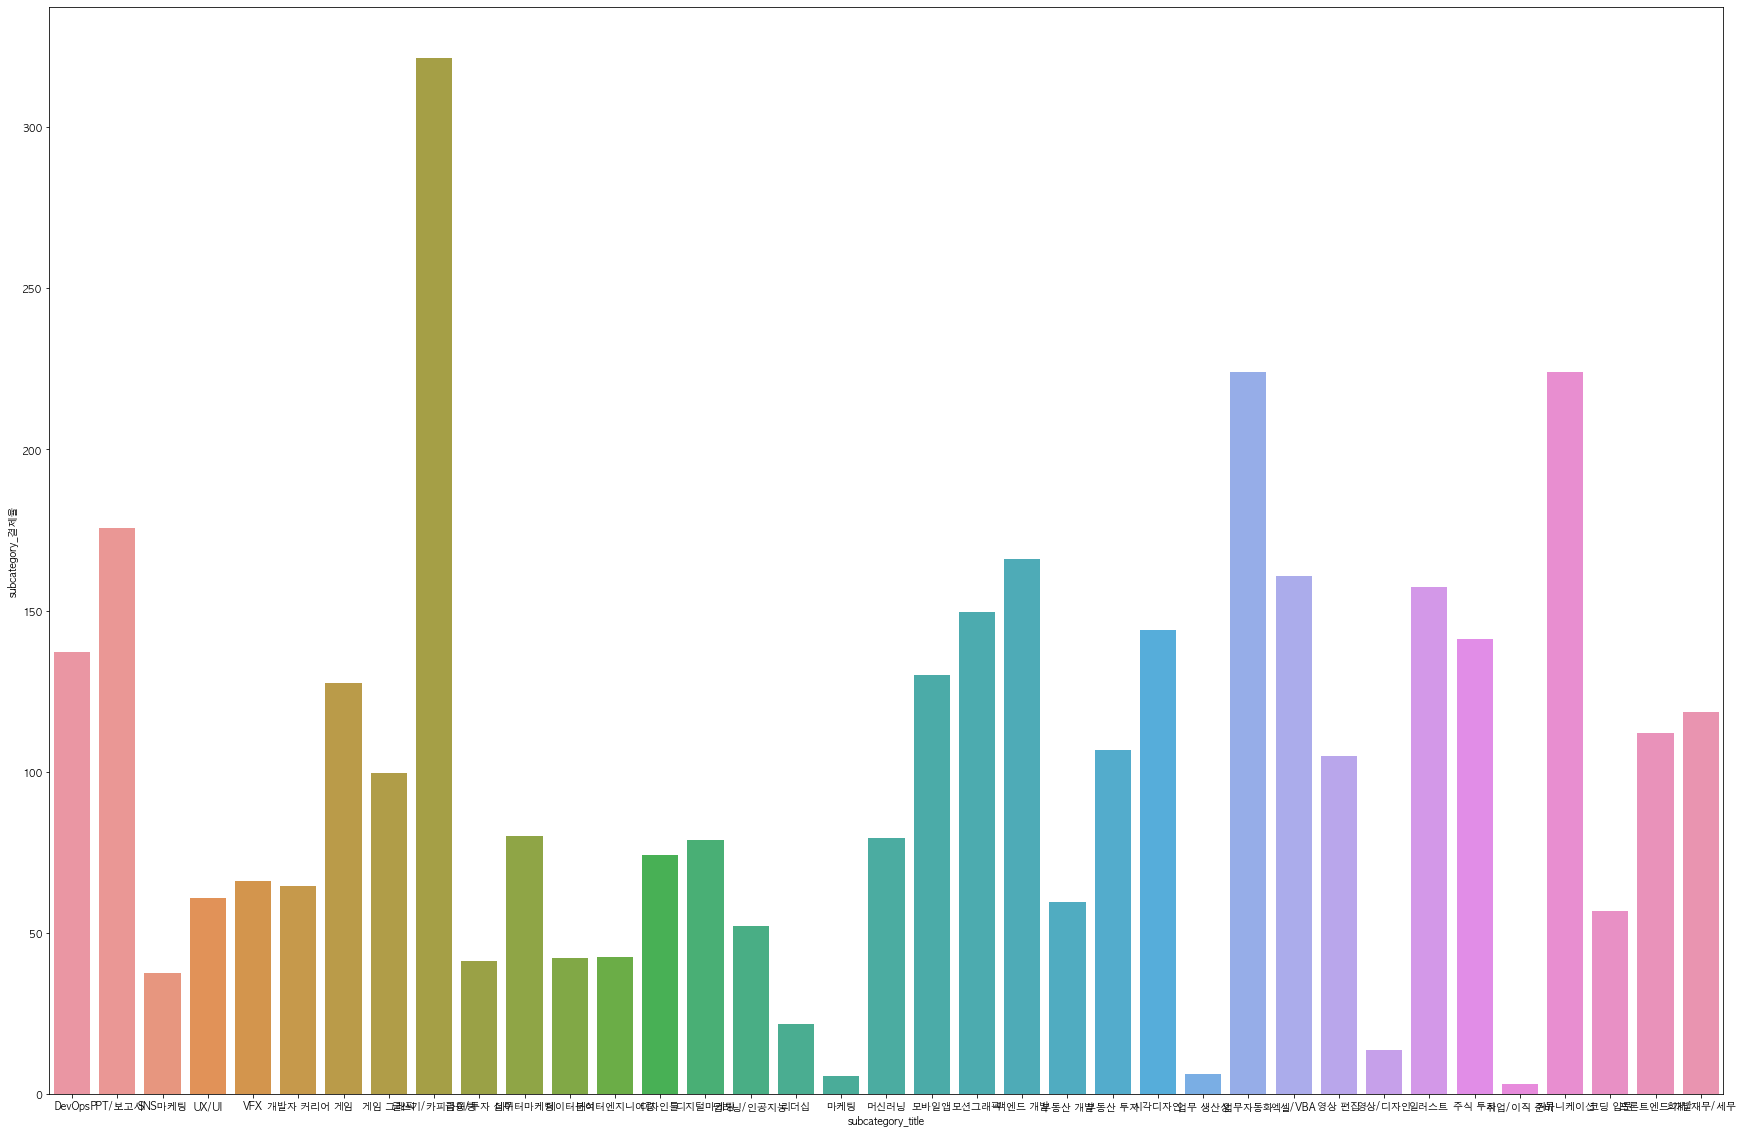

In [ ]:
fig,ax=plt.subplots(figsize=(30, 20))
sns.barplot(data=sub_amount_merge2,x=sub_amount_merge2.index,y=sub_amount_merge2['subcategory_결제율'].sort_index(),ax=ax)

plt.show()

##### [데이터 살펴보기]
<div class="alert alert-block alert-success">
    특이점 <br>
    1. 글쓰기/카피라이팅, 커뮤니케이션, 업무 자동화 카테고리의 경우 강의 수는 적지만 결제 건수는 상대적으로 많아,<br>   강의당 결제 건수가 높다는 것을 확인할 수 있었다.<br>
    2. 취업/이직준비, 마케팅, 업무생산성은 상위 3개 카테고리에 비해 강의 수가 많았지만 강의당 결제율이 낮았다.

</div>

In [ ]:
sub_amount_merge2.describe()

,평균_결제액,subcategory_결제_건수,subcategory_강의_수,subcategory_결제율
count,37.000000,37.000000,37.000000,37.000000
mean,165337.843679,1205.891892,15.162162,99.601238
std,75003.205293,990.876486,14.008953,69.310997
min,22551.049107,18.000000,2.000000,3.000000
25%,122865.270544,448.000000,6.000000,52.155556
50%,140439.202541,947.000000,12.000000,79.923077
75%,174943.798636,1691.000000,18.000000,141.285714
max,417722.772277,3456.000000,66.000000,321.400000


In [ ]:
sub_amount_merge2.corr()

,평균_결제액,subcategory_결제_건수,subcategory_강의_수,subcategory_결제율
평균_결제액,1.000000,-0.407846,0.000433,-0.574311
subcategory_결제_건수,-0.407846,1.000000,0.688385,0.276822
subcategory_강의_수,0.000433,0.688385,1.000000,-0.322079
subcategory_결제율,-0.574311,0.276822,-0.322079,1.000000


##### [결론]
<div class="alert alert-block alert-success">
    <b>[결론] </b> <br>    1. 하위카테고리의 결제율과 평균 결제액과 상관관계가 높지 않아 영향을 준다고 보기 어렵다.<br> 
2. 평균 결제액과 하위카테고리 강의 수는 거의 0에 가깝다 <br>->이는 평균 결제액과 강의 수는 상관관계가 없음을 의미한다.<br> 
3. 결제 건수와 강의 수의 상관관계가 높다고할 수 없으나 위 그래프의 상관관계 중 둘의 관계가 1에 가장 가까워 강의 수가 많다면 결제 수가 많다고 할 수 있음
</div>

---

#### [가설 2.] 카테고리 별 결제건이 많은 강의를 확인해 주요 고객층을 예상할 수 있다. 
<div class="alert alert-block alert-success">
    <b>고객층 분류 예상: </b> : 취업 준비·직무 교육, 기업고객·정부사업<br>
    카테고리 내 결제 건수가 많은 상위 5개의 강의명을 통해 각 카테고리가 어떤 고객층에게 수요가 높은지 예측할 수 있다. 
</div>

pie(카테고리) ->  barplot(['course_title'].value_counts()[:5]) 

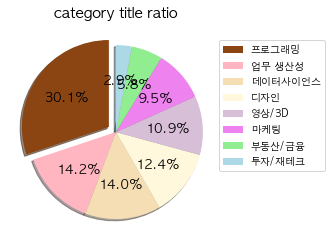

In [ ]:
goeun_eda_re['category_title'].value_counts()

colors = ['saddlebrown', 'lightpink', 'wheat','cornsilk','thistle','violet','lightgreen','lightblue','darkviolet']
labels=goeun_eda_re['category_title'].value_counts().index
plt.pie(goeun_eda_re['category_title'].value_counts(),startangle = 90,explode = (0.1,0,0,0,0,0,0,0),shadow=True,autopct='%.01f%%',colors=colors,textprops = {'fontsize':13})
plt.title('category title ratio', fontsize = 15)
plt.legend(labels=labels, loc='lower left', bbox_to_anchor=(0.95, 0.3))

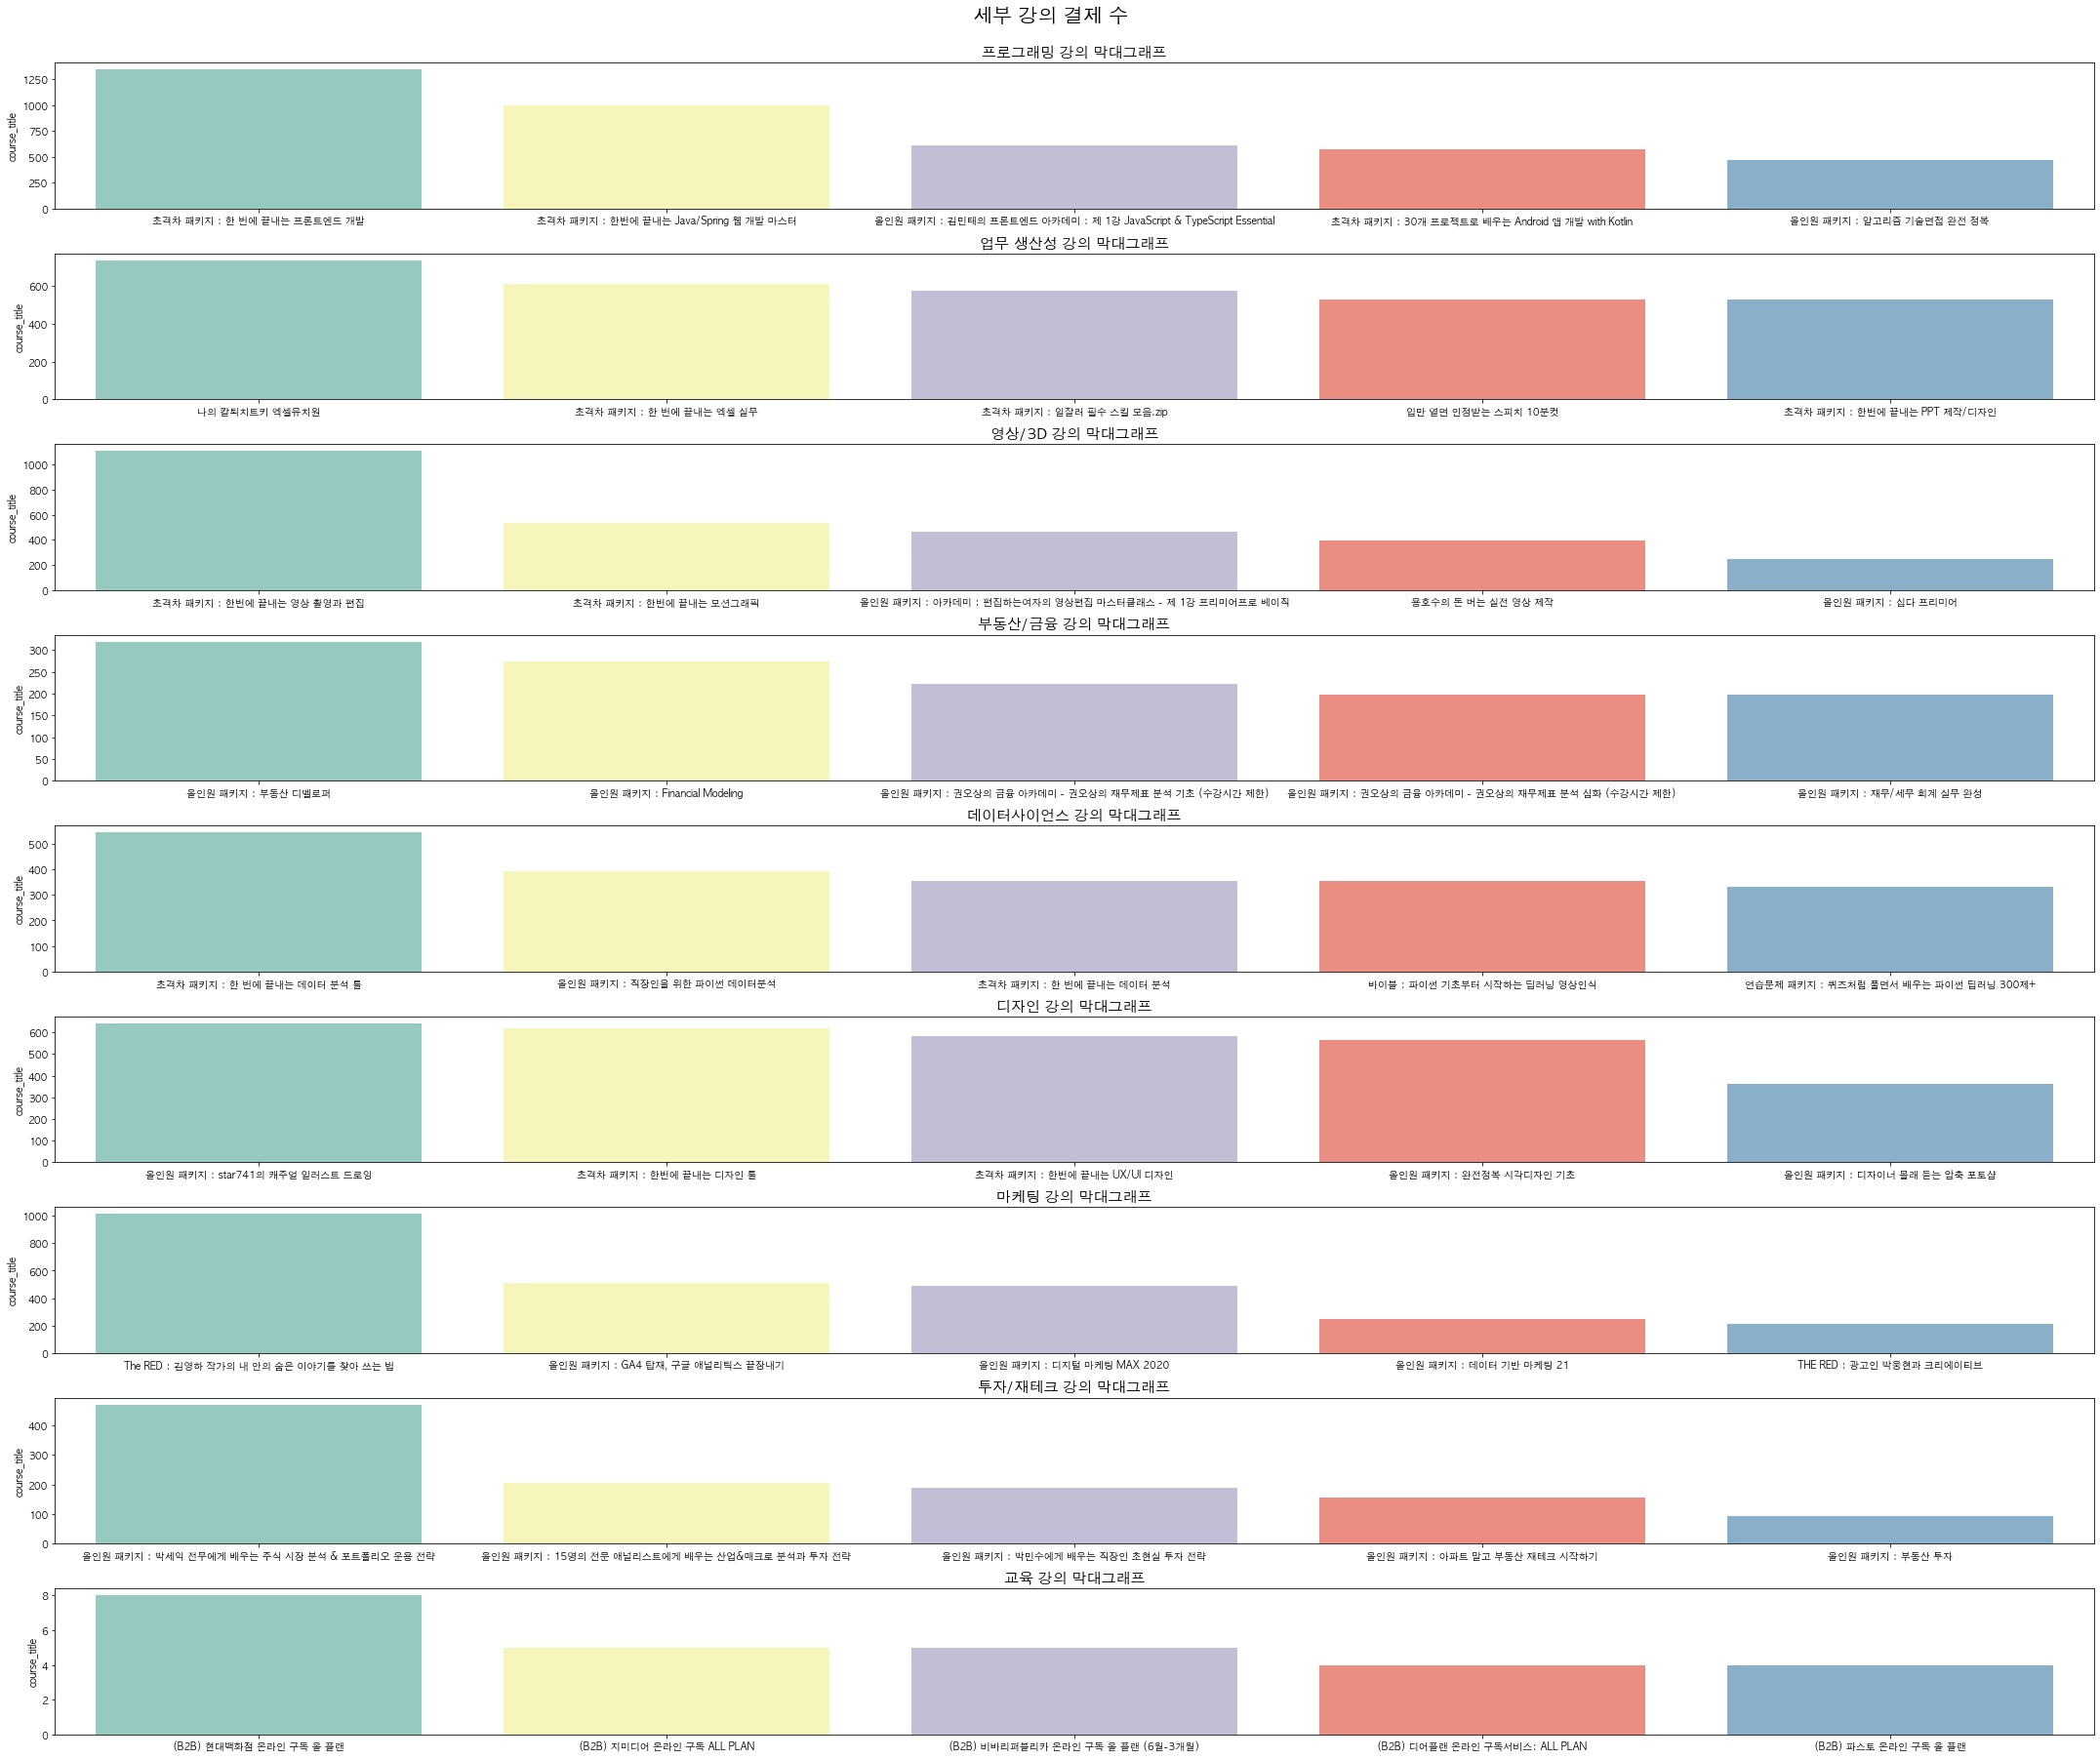

In [ ]:
new = goeun_eda.pivot_table(index=['category_title', 'course_title'], values='id', aggfunc='count')
new = new.reset_index().sort_values(by=['category_title', 'id'])
plt.figure(figsize = (15, 25))
plt.suptitle('세부 강의 결제 수', position=(0.5,1))
for i, name in enumerate(goeun_eda.category_title.unique()):
    if i > 0:
      ax1 = plt.subplot(18, 1, 2 * i + 1, sharex = ax1)
      ax2 = plt.subplot(18, 1, 2 * i + 2, sharex = ax1)
    else:
      ax1 = plt.subplot(18, 1, 2 * i + 1)
      ax2 = plt.subplot(18, 1, 2 * i + 2, sharex = ax1)
    ax1.set_title(f'{name} 강의 결제 수')
    new.loc[new.category_title == f'{name}'].plot.barh(x='course_title', y='id', ax=ax1, legend=False)
    new.loc[new.category_title == f'{name}'].plot.barh(x='course_title', y='id', ax=ax2, legend=False)

    y_min, y_max = ax1.get_ylim()
    ax1.set_ylim(y_max - 5, y_max)
    ax2.set_ylim(y_min, y_min + 3)

    ax1.grid(color="k", alpha=0, linestyle=":", zorder=1)
    ax2.grid(color="k", alpha=0, linestyle=":", zorder=1)
    ax1.set_ylabel('')
    ax2.set_ylabel('')
    ax1.spines["bottom"].set_visible(False)
    ax2.spines["top"].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False)  
    ax2.xaxis.tick_bottom()

    d = .25  
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.tight_layout()
plt.show()

**설명** <br>
상위 카테고리 기준으로 course_title의 상위 5개의 항목을 결제 건수로 집계한 막대그래프임

##### 결과

<div class="alert alert-block alert-success">
    <b>category title 별로 course title의 name으로 고객을 유추할 수 있다.</b> <br>
    [예상 고객층] <br>
 - 취준생/이직 : 프로그래밍, 영상/3D, 부동산/금융, 데이터사이언스, 디자인<br>
 - 기업교육 : 올플랜, 프로그래밍, 데이터사이언스<br>
 - 사회초년생 : 업무 생산성, 데이터사이언스, 마케팅<br>
 - 재테크 : 투자/재테크
</div>

---

#### [가설 3.] 요일 및 시간대에 따른 결제 건수 빈도 분석을 통해 프로모션 효과가 높은 시간대를 찾을 수 있다. 
<div class="alert alert-block alert-success">
    <b>사람들은 평일/주말 중 언제 결제를 많이 할까?<br>
    하루 중 강의 결제가 가장 활발하게 이루어지는 시간대는 언제일까?</b> <br> 
    와 같은 궁금증에 대한 답을 찾기 위해 "completed_at" column을 분석하였다. <br>

</div>

In [ ]:
#요일별 비교를 위한 코드
#구매 시점 데이터 타입 변경 (to datetime64) 및 새로운 df 생성
df_cpl = pd.DataFrame(pd.to_datetime(df['completed_at']))
df_cpl

,completed_at
0,2021-03-28 15:21:43
1,2021-03-28 15:21:54
2,2021-03-28 15:26:47
3,2021-03-28 15:27:17
4,2021-03-28 15:33:28
...,...
50375,2021-09-25 13:39:26
50376,2021-09-25 13:46:29
50377,2021-09-25 14:01:26
50378,2021-09-25 14:17:41


In [ ]:
# 요일 컬럼 추가
df_cpl['n_d_week'] = df_cpl.completed_at.dt.weekday
df_cpl['d_week'] = df_cpl.completed_at.dt.day_name()

# 일 컬럼 추가
df_cpl['day'] = df_cpl.completed_at.dt.day

# 시간 컬럼 추가
df_cpl['hour'] = df_cpl.completed_at.dt.hour

df_cpl

,completed_at,n_d_week,d_week,day,hour
0,2021-03-28 15:21:43,6,Sunday,28,15
1,2021-03-28 15:21:54,6,Sunday,28,15
2,2021-03-28 15:26:47,6,Sunday,28,15
3,2021-03-28 15:27:17,6,Sunday,28,15
4,2021-03-28 15:33:28,6,Sunday,28,15
...,...,...,...,...,...
50375,2021-09-25 13:39:26,5,Saturday,25,13
50376,2021-09-25 13:46:29,5,Saturday,25,13
50377,2021-09-25 14:01:26,5,Saturday,25,14
50378,2021-09-25 14:17:41,5,Saturday,25,14


In [ ]:
# 요일별 카운팅 및 정렬
df_days_cnt = df_cpl.groupby('d_week').count().loc[:,:'completed_at']
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_days_cnt_asc = df_days_cnt.loc[weekday_order]
df_days_cnt_asc

,completed_at
d_week,
Monday,8967
Tuesday,7592
Wednesday,7700
Thursday,6253
Friday,7683
Saturday,4856
Sunday,7329


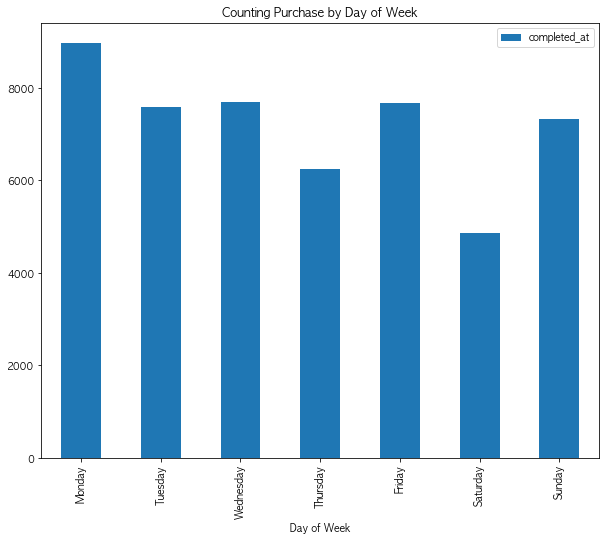

In [ ]:
#요일별 구매 건수 시각화
df_days_cnt_asc.plot.bar(figsize=(10,8))
plt.title('Counting Purchase by Day of Week')
plt.xlabel('Day of Week')
plt.show()

<div class="alert alert-block alert-success">
    요일별 구매건 수 비교 시, 눈에 띄는 편차는 월요일과 토요일이었다. <br>
    한 주의 시작인 월요일에 학습에 대한 욕구가 비교적 강하게 발현되고 주말에는 줄어드는 모습을 찾을 수 있었다. <br>
    반면 새로운 주의 월요일을 앞둔 일요일은 다시 결제 건수가 증가했다. <br>
    광고 노출이나 쿠폰 발행 등의 프로모션은 되도록 <b>월요일</b>이나 <b> 일요일</b>에 하는것이 효과적일 것이다. 
</div>

In [ ]:
# 구매 시간대를 6개로 나누어 결제 건수를 비교해보자.
# 직장인/학생들이라면 낮에는 일, 공부로 바쁠테니 밤에 결제가 활발하지 않았을까?

# 함수 생성
def timeslot(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

df_cpl['time_s'] = df_cpl['hour'].apply(timeslot)
df_cpl

,completed_at,n_d_week,d_week,day,hour,time_s
0,2021-03-28 15:21:43,6,Sunday,28,15,Noon
1,2021-03-28 15:21:54,6,Sunday,28,15,Noon
2,2021-03-28 15:26:47,6,Sunday,28,15,Noon
3,2021-03-28 15:27:17,6,Sunday,28,15,Noon
4,2021-03-28 15:33:28,6,Sunday,28,15,Noon
...,...,...,...,...,...,...
50375,2021-09-25 13:39:26,5,Saturday,25,13,Noon
50376,2021-09-25 13:46:29,5,Saturday,25,13,Noon
50377,2021-09-25 14:01:26,5,Saturday,25,14,Noon
50378,2021-09-25 14:17:41,5,Saturday,25,14,Noon


In [ ]:
# 시간대별 카운팅 및 정렬
df_time_s_cnt = df_cpl.groupby('time_s').count().loc[:,:'completed_at']
time_s_order = ['Early Morning', 'Morning', 'Noon', 'Eve', 'Night', 'Late Night']
df_time_s_cnt_asc = df_time_s_cnt.loc[time_s_order]
df_time_s_cnt_asc

,completed_at
time_s,
Early Morning,2531
Morning,9358
Noon,12124
Eve,11217
Night,10965
Late Night,4185


<div class="alert alert-block alert-success">
 결제는 주로 오후 시간대에 이루어지며, 늦은 밤이나 새벽을 제외하고는 큰 차이가 없었다.  <br>
 프로모션을 진행할 경우 시간대에는 요일만큼의 영향을 미치지 않겠지만, 굳이 시간대 별 프로모션을 한다면 오후 시간대를 위주로 지정하고,  <br> 0시~8시 구간의 시간대는 피하는 것이 좋을듯 하다.</div>

In [ ]:
# 요일별, 시간대별 분류 및 정렬
# 원활한 시각화를 위한 인덱스 제거
df_cpl_wd_t_cnt = df_cpl.groupby(['d_week','time_s']).count().loc[(weekday_order, time_s_order),:].reset_index()
df_cpl_wd_t_cnt.head()

,d_week,time_s,completed_at,n_d_week,day,hour
0,Monday,Early Morning,378,378,378,378
1,Monday,Morning,2025,2025,2025,2025
2,Monday,Noon,2153,2153,2153,2153
3,Monday,Eve,2019,2019,2019,2019
4,Monday,Night,1726,1726,1726,1726


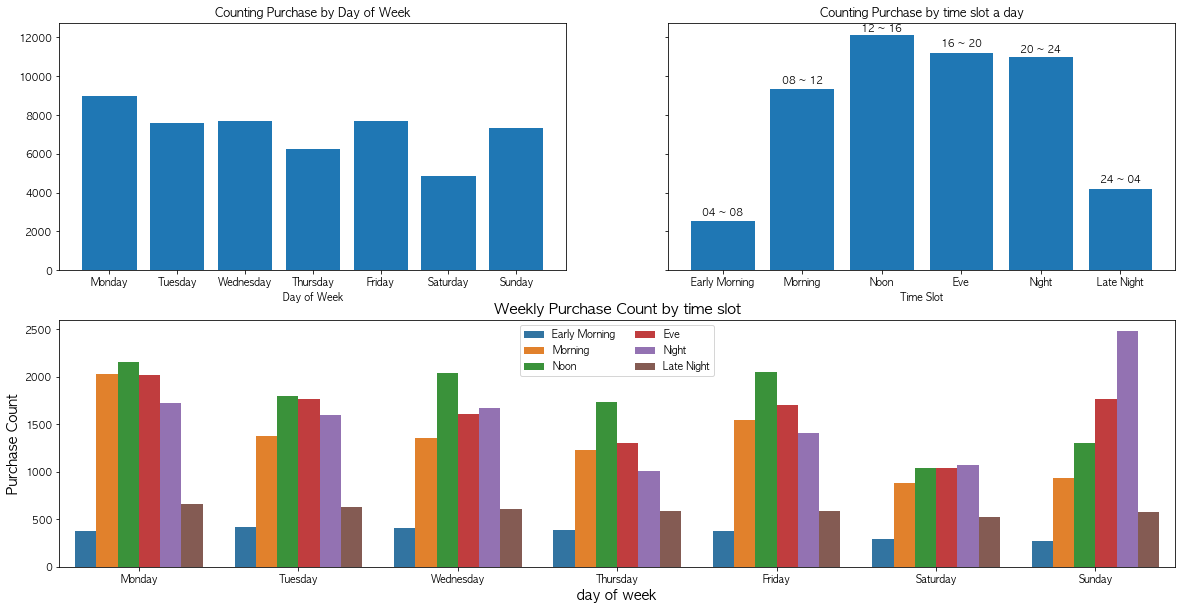

In [ ]:
# 그래프 합치기 
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(20,10))

#요일별 구매 건수 시각화
plt.subplot(2,2,1)
plt.bar(df_days_cnt_asc.index, df_days_cnt_asc['completed_at']) # 여기에 X, Y1 
plt.title('Counting Purchase by Day of Week')
plt.xlabel('Day of Week')


# 시간대별 구매 건수 시각화
plt.subplot(2,2,2)
plt.bar(df_time_s_cnt_asc.index, df_time_s_cnt_asc['completed_at']) # 여기 X y 
plt.title('Counting Purchase by time slot a day')
plt.annotate('04 ~ 08',(0,2800), ha='center')
plt.annotate('08 ~ 12',(1,9600), ha='center')
plt.annotate('12 ~ 16',(2,12300), ha='center')
plt.annotate('16 ~ 20',(3,11500), ha='center')
plt.annotate('20 ~ 24',(4,11200), ha='center')
plt.annotate('24 ~ 04',(5,4500), ha='center')
plt.xlabel('Time Slot')


# 요일별& 구매시간대 별 시각화 
plt.subplot(2,1,2)
plt.title('Weekly Purchase Count by time slot', fontsize=15)
sns.barplot(data = df_cpl_wd_t_cnt,
            x = df_cpl_wd_t_cnt['d_week'],
            y = df_cpl_wd_t_cnt['completed_at'],
            hue = df_cpl_wd_t_cnt['time_s'])

# plt.xticks(list(range(7)), weekday_order)
plt.xlabel('day of week', fontsize=14)
plt.ylabel('Purchase Count', fontsize=14)
plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1))

plt.show()

##### 결론 
<div class="alert alert-block alert-success">
평일은 오후시간대 주말은 저녁시간에 구매가 주로 이루어지며 구매 패턴의 명확한 차이를 보인다. <br>
눈에 띄는 구간은 일요일 밤 시간대로 시간대 별 구매율이 가장 높고, 동 시간대 중 가장 낮은 구매율을 보인 목요일과 비교하면 두배 이상 많은 건수를 보여준다.<br>
요일별 시간대 분석은 이전 결과와는 다른 양상을 보이며 좀 더 구체적인 분석의 필요성을 느낄 수 있었다. <br>

구매 건수에 대한 요일과 시간대 모두 고려했을 때, <br>
    <b>월요일 오후 시간대 타겟 프로모션 보다 일요일 밤 시간대 타겟 프로모션이 더욱 효과적일 것이다.</b>
    </div>

---

#### [가설 4.] 쿠폰 사용 비율이 높은 카테고리는 결제 건수가 많을 것이다. 


##### [데이터 살펴보기]
전처리를 통해서 쿠폰을 사용한 고객은 1, 사용하지 않고 구매한 고객은 0으로 표시한 컬럼이 추가되었다.    
이 열을 통해 카테고리 별로 쿠폰 사용률이 얼마나 되는지 알아보자. 


In [ ]:
#쿠폰을 사용해서 구입한 비율이 높은 카테고리를 찾고, 결제 건수가 실제로 많은지 찾아보자.  

#쿠폰 비율이 높은 카테고리 먼저 찾기
cou = jieun_eda[['customer_id', 'new_coupon_discount', 'category_title', 'transaction_amount']]
cou.head()

,customer_id,new_coupon_discount,category_title,transaction_amount
0,72297.0,1.0,프로그래밍,171810
1,478028.0,1.0,업무 생산성,97500
2,478033.0,1.0,영상/3D,96000
3,469860.0,0.0,부동산/금융,263000
4,478031.0,0.0,데이터사이언스,299000


In [ ]:
#쿠폰 사용 비율, 카테고리당 평균 결제 가격, 결제 건수 확인
cate_pay= cou.groupby('category_title').mean('transaction_amount')
cate_num = cou.groupby('category_title').size().reset_index()

result3 = pd.merge(cate_pay,cate_num,how='outer',on='category_title')
result3.columns=['category_title','customer_id','쿠폰 사용 비율','평균 결제가격','결제 건수']
result3 = result3.sort_values('결제 건수')
result3.drop(['customer_id'], axis=1, inplace=True)
result3

,category_title,쿠폰 사용 비율,평균 결제가격,결제 건수
0,교육,0.000000,1.295001e+06,935
7,투자/재테크,0.577982,2.075275e+05,1417
4,부동산/금융,0.434543,1.790439e+05,2727
3,마케팅,0.352994,1.713387e+05,4476
6,영상/3D,0.552909,1.234153e+05,5122
2,디자인,0.548637,1.438712e+05,5798
1,데이터사이언스,0.438950,2.376666e+05,6593
5,업무 생산성,0.408719,1.038895e+05,6606
8,프로그래밍,0.432146,1.088931e+05,16705


In [ ]:
#상관계수? (교육 카테고리는 모두 B2B라, 제외 후 상관계수 계산)
result_3 = result3.drop([0], axis=0)
result_3.corr()

,쿠폰 사용 비율,평균 결제가격,결제 건수
쿠폰 사용 비율,1.000000,0.065587,-0.285328
평균 결제가격,0.065587,1.000000,-0.511962
결제 건수,-0.285328,-0.511962,1.000000


##### [결론]
<div class="alert alert-block alert-success"> 
 - 쿠폰 사용률이 가장 높은 카테고리는 투자/재테크, 가장 낮은 카테고리는 마케팅이었다.   <br>  
 - 카테고리 별 쿠폰 사용률과 결제 건수 간 상관관계는 낮다. <br> 
 - 교육 카테고리는 모두 B2B결제였기 때문에 쿠폰을 사용하지 않았다. <br> => 다른 분석에서 B2C 를 타겟으로 한다면 '교육' 카테고리를 제외할 필요가 있어보인다. <br> 
</div>

---

#### [가설 5.] 카테고리 별 결제 건수와 강의 개수의 비를 통해 카테고리 별 수요를 알 수 있다.


특정 카테고리의 결제 건수가 많다고 해서 단순히 해당 카테고리의 수요가 많다고 결론 내리기에는 다소 성급해보인다. <br>
카테고리 별로 판매하고 있는 강의 개수가 각각 다를 것이기 때문에, 강의 수 당 몇 번이나 팔렸는지 확인해    <br>
결제 건수가 많은 카테고리가 진짜로 인기가 많아서 많이 팔린 것인지, 강의 수 자체가 많은지 알아보았다. <br>

In [ ]:
#카테고리 별 강의 개수를 알아보자 (가정: 카테고리 내 강의들은 최소한 1회는 팔렸을 것이다)
data1 = jieun_eda[['category_title','course_title']].groupby('category_title')['course_title'].nunique()
data1

category_title
교육         860
데이터사이언스    161
디자인         67
마케팅         73
부동산/금융      51
업무 생산성      79
영상/3D       49
투자/재테크      11
프로그래밍      203
Name: course_title, dtype: int64

In [ ]:
#result3 + data1 를 category_title 로 합쳐서 결제 건수 / 강의 개수 = 카테고리별 강의 개수 당 결제 건수 보기 
#강의 건수 대비 결제 비율
cat_pur = pd.merge(result3,data1,how='inner',on='category_title')
cat_pur['purchase_per_course'] = cat_pur['결제 건수']/cat_pur['course_title']
cat_pur.rename(columns = {'course_title':'course_amount'},inplace=True)
cat_pur.sort_values('course_amount')

,category_title,쿠폰 사용 비율,평균 결제가격,결제 건수,course_amount,purchase_per_course
1,투자/재테크,0.577982,2.075275e+05,1417,11,128.818182
4,영상/3D,0.552909,1.234153e+05,5122,49,104.530612
2,부동산/금융,0.434543,1.790439e+05,2727,51,53.470588
5,디자인,0.548637,1.438712e+05,5798,67,86.537313
3,마케팅,0.352994,1.713387e+05,4476,73,61.315068
7,업무 생산성,0.408719,1.038895e+05,6606,79,83.620253
6,데이터사이언스,0.438950,2.376666e+05,6593,161,40.950311
8,프로그래밍,0.432146,1.088931e+05,16705,203,82.290640
0,교육,0.000000,1.295001e+06,935,860,1.087209


In [ ]:
#혹시라도, 쿠폰이 투자/재테크 전용 쿠폰이었던건 아닐까?
hoxy = jieun_eda[jieun_eda.coupon_title.notna()][jieun_eda[jieun_eda.coupon_title.notna()].coupon_title.str.contains('투자|재테크')]
hoxy[hoxy['category_title'] == '투자/재테크'].info(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 2422 to 50342
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      112 non-null    int64  
 1   customer_id             112 non-null    float64
 2   course_id               112 non-null    float64
 3   type                    112 non-null    object 
 4   state                   112 non-null    object 
 5   course_title            112 non-null    object 
 6   category_title          112 non-null    object 
 7   format                  112 non-null    object 
 8   completed_at            112 non-null    object 
 9   transaction_amount      112 non-null    int64  
 10  coupon_title            112 non-null    object 
 11  coupon_discount_amount  112 non-null    float64
 12  new_coupon_discount     112 non-null    float64
 13  sale_price              112 non-null    float64
 14  tax_free_amount         112 non-null 

In [ ]:
hoxy_oppo = jieun_eda[jieun_eda.coupon_title.notna()][jieun_eda[jieun_eda.coupon_title.notna()].coupon_title.str.contains('투자|재테크')==False]
hoxy_oppo[hoxy_oppo['category_title'] == '투자/재테크'].head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,new_coupon_discount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
148,971766,478363.0,201313.0,PAYMENT,COMPLETED,올인원 패키지 : 부동산 투자,투자/재테크,올인원,2021-03-28 23:07:42,105000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,1.0,115000.0,115000.0,NaN,CARD,부동산 투자,NaN
300,972688,461307.0,201313.0,PAYMENT,COMPLETED,올인원 패키지 : 부동산 투자,투자/재테크,올인원,2021-03-29 10:31:55,0,수강생 50만명 돌파 기념 감사제 쿠폰,140000.0,1.0,115000.0,115000.0,NaN,PROMOTION,부동산 투자,NaN
313,972752,435953.0,201313.0,PAYMENT,COMPLETED,올인원 패키지 : 부동산 투자,투자/재테크,올인원,2021-03-29 10:39:11,0,수강생 50만명 돌파 기념 감사제 쿠폰,123500.0,1.0,115000.0,115000.0,NaN,PROMOTION,부동산 투자,NaN
352,972926,461610.0,202789.0,PAYMENT,COMPLETED,올인원 패키지 : 2021 취업/이직/투자를 위한 기업분석,투자/재테크,올인원,2021-03-29 11:05:09,0,수강생 50만명 돌파 기념 감사제 쿠폰,125000.0,1.0,102500.0,102500.0,NaN,PROMOTION,주식 투자,2020-09-11 00:00:00
379,973100,130325.0,201313.0,PAYMENT,COMPLETED,올인원 패키지 : 부동산 투자,투자/재테크,올인원,2021-03-29 11:38:07,26000,수강생 50만명 돌파 기념 감사제 쿠폰,89000.0,1.0,115000.0,115000.0,NaN,CARD,부동산 투자,NaN


<div class="alert alert-block alert-success">
투자/재테크 카테고리의 총 결제건수 1417건 중 쿠폰 사용 건은 819건, 그 중 투자 혹은 재테크 키워드를 가진 쿠폰은 112건으로 <br> 전용쿠폰이 아니라 다른 카테고리에도 쓸 수 있었던 쿠폰을 투자/재테크 카테고리 강의의 구매에 사용한 것을 알 수 있었다. 
    </div>

In [ ]:
cat_pur = cat_pur.drop([0], axis=0)
cat_pur.corr()

,쿠폰 사용 비율,평균 결제가격,결제 건수,course_amount,purchase_per_course
쿠폰 사용 비율,1.000000,0.065587,-0.285328,-0.452010,0.738576
평균 결제가격,0.065587,1.000000,-0.511962,-0.116295,-0.288873
결제 건수,-0.285328,-0.511962,1.000000,0.879852,-0.139414
course_amount,-0.452010,-0.116295,0.879852,1.000000,-0.493859
purchase_per_course,0.738576,-0.288873,-0.139414,-0.493859,1.000000


##### [결론 & 제안사항]
<div class="alert alert-block alert-success">
    <b>[결론] </b> <br>     
 - 강의 건수 대비 판매율이 높다 = 인기있는 카테고리다.   <br> 
 강의 건수 대비 판매율과 쿠폰 사용 여부가 유의미한 상관관계를 가짐을 확인할 수 있었다. <br> 
 - 인기있는 카테고리 구매 시 쿠폰 사용률이 높았다.    <br> 
 
투자/재테크 카테고리의 경우 2020년 코로나19로 인해 위축된 시장이 회복세를 보이면서 2021년 투자에 대한 관심이 는 것으로 추측된다.  <br> 
 ![alt text](2020_stock.png "Title")
  ![alt text](2021_stock.png "Title")

   <b>[suggestion] </b> <br> 

 - 강의 건수 대비 판매율이 높은 카테고리인 투자/재테크, 영상/3D 강의 개수를 늘리자.      
 다만 2022년 상황이.. 그렇게 좋지 않기 때문에 투자/재테크 카테고리에서 주식보다는 다른 분야의 재테크 강의를 런칭하는 것이 더 좋아 보인다. <br> 
  아래와 같이 각 카테고리 내에서 판매 건 수가 많았던 하위 카테고리들을 고려하여 신규 강의 런칭 계획을 짤 수 있을 것이다. 
 - 추가로, 신규 강의 런칭 시 신규 고객 유도를 위한 관련 쿠폰을 같이 발급하면 결제 건수를 늘릴 수 있을 것이다. 
    </div>

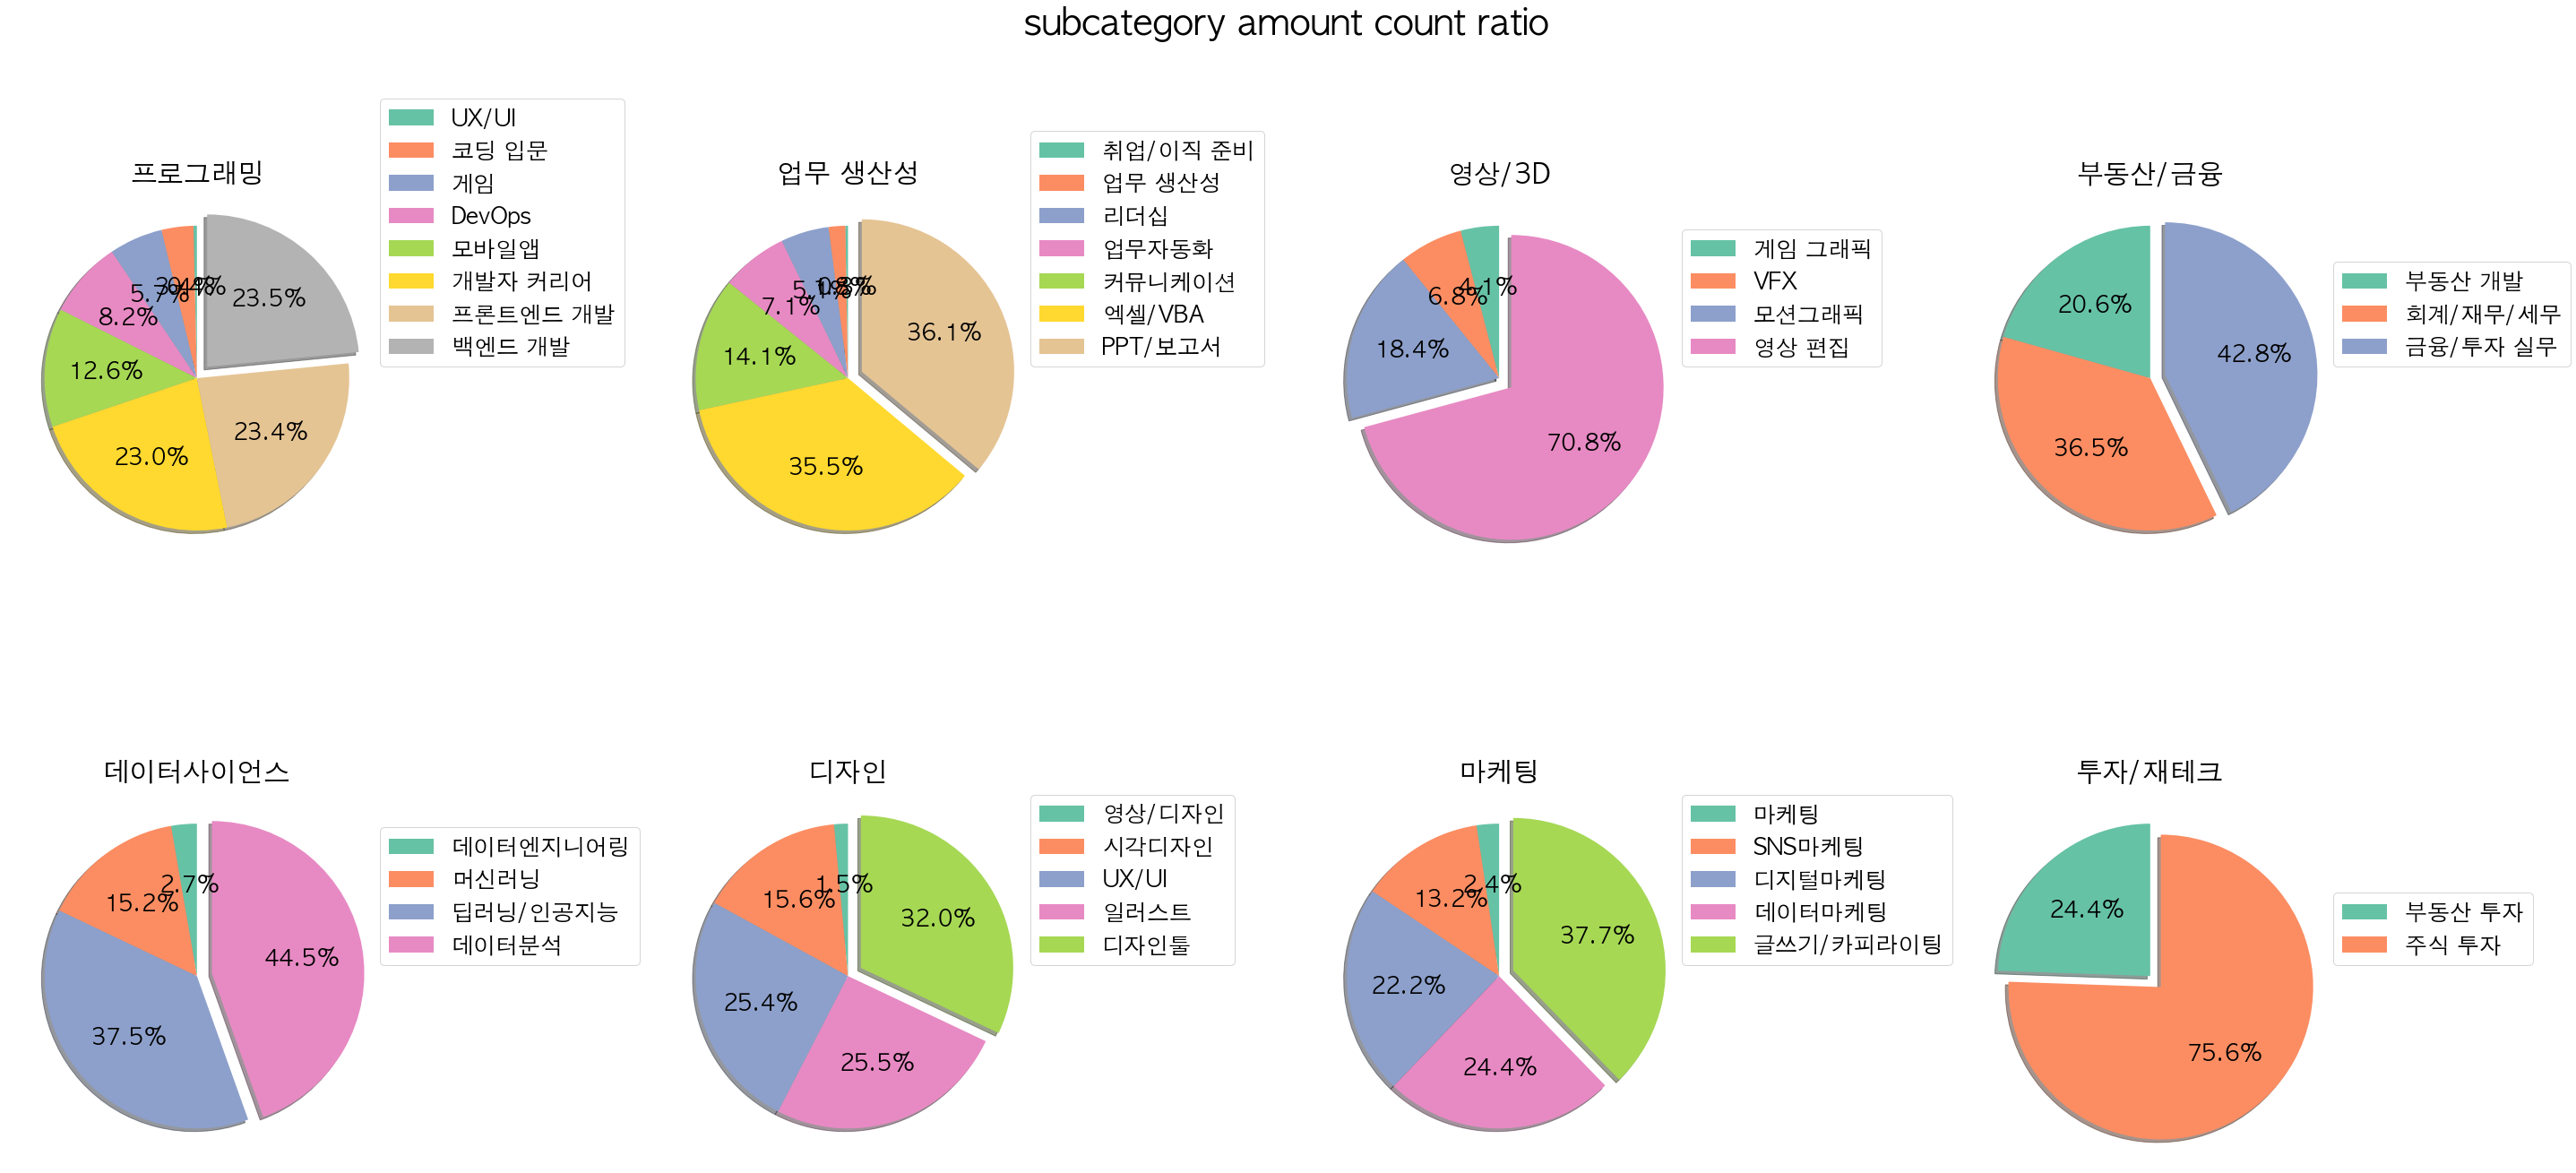

In [ ]:
# 하위 카테고리 별 판매 건 수 알아보기
plt.figure(figsize=(40, 20))
plt.suptitle('subcategory amount count ratio', fontsize =40)
for i, name in enumerate(goeun_eda_re.category_title.unique()):
    data_subcategory=goeun_eda_re[goeun_eda_re['category_title'] == name]['subcategory_title'].value_counts().sort_values()

    colors = sns.color_palette('Set2')
    labels=data_subcategory.index
    plt.subplot(2,4,i+1)
    plt.pie(data_subcategory,startangle = 90,
            explode = [0 if i != len(data_subcategory) - 1 else 0.1 for i in range(len(data_subcategory))],
            shadow=True,autopct='%.01f%%',
            colors=colors,
            textprops = {'fontsize':25})
    plt.title(f'{name}',  fontsize =30)
    plt.legend(labels=labels, loc='lower left', bbox_to_anchor=(0.95, 0.5), fontsize =25)
    
plt.tight_layout()

---

#### [가설 6.] customer id를 기준으로 결제 횟수를 분석해 재구매 유도 전략이 유의미할지 확인할 수 있다.  

<div class="alert alert-block alert-success">
    <b>1. 기존 고객의 재구매 유도하기 vs 신규 고객의 첫 구매 유도하기 중 어떤 것이 더 효과 있을까?</b> <br> 
    전체 구매 데이터 내에서 1번만 구매한 고객/재구매 이력이 있는 고객으로 나눠보기<br>
    <b>2. 웰컴쿠폰/WELCOME 쿠폰 발급은 신규 고객의 유입을 위한 전략이다. 효과가 있었을까?</b>
    
</div>


In [ ]:
# 원래는 카테고리별로 어떤 강의를 구매했는지 확인하기 위한 데이터프레임
# marginal 인 All column 이 결국은 강의를 몇 번 구매했는지를 나타낸다.
df_payment_check = df.pivot_table('transaction_amount', 'customer_id', 'category_title', aggfunc='count', margins=True)
df_payment_check

category_title,교육,데이터사이언스,디자인,마케팅,부동산/금융,업무 생산성,영상/3D,투자/재테크,프로그래밍,All
customer_id,,,,,,,,,,
46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
47.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
96.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1
152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...,...
670891.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
672301.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
672307.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# All == 1 이면 강의를 한 번만 구매했다.
df_payment_check['repurchase_check'] = 1
df_payment_check.loc[df_payment_check.All == 1, 'repurchase_check'] = 0

In [ ]:
# 강의를 2번 이상 구매한 사람들 count
data = df_payment_check[df_payment_check.repurchase_check == 1].All.value_counts().sort_index()[:-1]
data

2     5004
3     1298
4      458
5      231
6      134
7       59
8       35
9       24
10      13
11      12
12       7
13       5
14       4
15       4
16       2
17       1
18       1
19       1
21       1
22       1
26       1
27       1
34       1
39       1
53       1
Name: All, dtype: int64

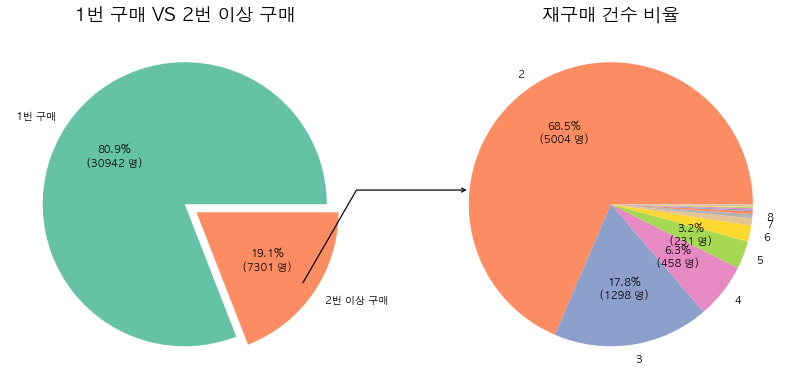

In [ ]:
#시각화

plt.figure(figsize=(14, 10))

ax1 = plt.subplot(1, 2, 1)
plt.title(f'1번 구매 VS 2번 이상 구매', size=18)
labels = ['1번 구매', '2번 이상 구매']
colors = sns.color_palette('Set2')

def func(pct, data):
    val = int(np.round(pct/100 * data.sum(), 0))
    if pct > 3:
        return f"{pct:.1f}%\n({val} 명)"
ax1.pie(df_payment_check.repurchase_check.value_counts(), explode= [0, 0.1], colors=colors, labels=labels, autopct=lambda pct: func(pct, df_payment_check.repurchase_check.value_counts()))
ang1, ang2 = ax1.patches[1].theta1, ax1.patches[1].theta2
ang = (ang2 + ang1)/2 ## 중심각
x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표

plt.ylabel('')



ax2 = plt.subplot(1, 2, 2)
labels = list(data.index[:7])+["" for _ in range(18)]
colors = sns.color_palette('Set2')
plt.title(f'재구매 건수 비율', size=18)
ax2.pie(data, colors=colors[1:], labels=labels, autopct=lambda pct: func(pct, data))

ang1_, ang2_ = ax2.patches[0].theta1, ax2.patches[0].theta2
ang_ = (ang2_ - ang1_)/2. + ang1_ ## 중심각
x_ = np.cos(np.deg2rad(ang_)) ## Annotation의 끝점에 해당하는 x좌표
y_ = np.sin(np.deg2rad(ang_)) ## Annotation의 끝점에 해당하는 y좌표

config = dict(arrowprops=dict(arrowstyle='<-', color='black', linewidth=1.2))
connectionstyle = f"angle,angleA=0,angleB=60"
config["arrowprops"].update({"connectionstyle": connectionstyle})
ax2.annotate("", xy=(x, y), xycoords=ax1.transData, xytext=(2, 0.1), color='black', **config)

plt.ylabel('')
plt.show()


In [ ]:
# 날짜에 따라서 재구매 유무를 따지기 위한 새로운 데이터프레임
df_repurchase = df.loc[[]]
df_repurchase['time_diff'] = None
for idx in data[:-1].index:
    df_loop = df.loc[[]]
    for customer_id in df_payment_check[df_payment_check['All'] == idx].index:
        df_loop = pd.concat([df_loop, df[df.customer_id == customer_id]])
    df_loop['time_diff'] = (df_loop.completed_at - df_loop.completed_at.shift(1)).dt.days
    df_repurchase = pd.concat([df_repurchase, df_loop.loc[df_loop.reset_index().index % idx != 0]])


# 첫 번째 결제는 제외한 나머지 결제 내역에 대한 결제와 결제 사이의 날짜 간격을 가지고 있는 df
df_repurchase.head(2)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,new_coupon_discount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,time_diff
29845,1206695,47.0,203533.0,PAYMENT,COMPLETED,연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+,데이터사이언스,올인원,2021-07-09 16:14:40,104000,NaN,NaN,0.0,104000.0,104000.0,KAKAO,POINT,머신러닝,2021-01-05,70.0
48805,1348577,153.0,203355.0,PAYMENT,COMPLETED,올인원 패키지 : 처음부터 시작하는 딥러닝 유치원,데이터사이언스,올인원,2021-09-15 22:07:47,159000,NaN,NaN,0.0,159000.0,159000.0,INICIS,CARD,딥러닝/인공지능,2021-01-14,2.0


In [ ]:
df_payment_check['purchase_once'] = 0

df_payment_check.loc[df_payment_check.repurchase_check == 0, 'purchase_once'] = 1
# 위에서 만든 새로운 데이터프레임에서 차집합을 이용하여 한꺼번에 강의를 구매한 사람들만 체크
df_payment_check.loc[pd.merge(df_repurchase.loc[df_repurchase.time_diff == 0], df_repurchase.loc[df_repurchase.time_diff != 0], on='customer_id', how='left').loc[pd.merge(df_repurchase.loc[df_repurchase.time_diff == 0], df_repurchase.loc[df_repurchase.time_diff != 0], on='customer_id', how='left').id_y.isna()].customer_id.unique(), 'purchase_once'] = 1

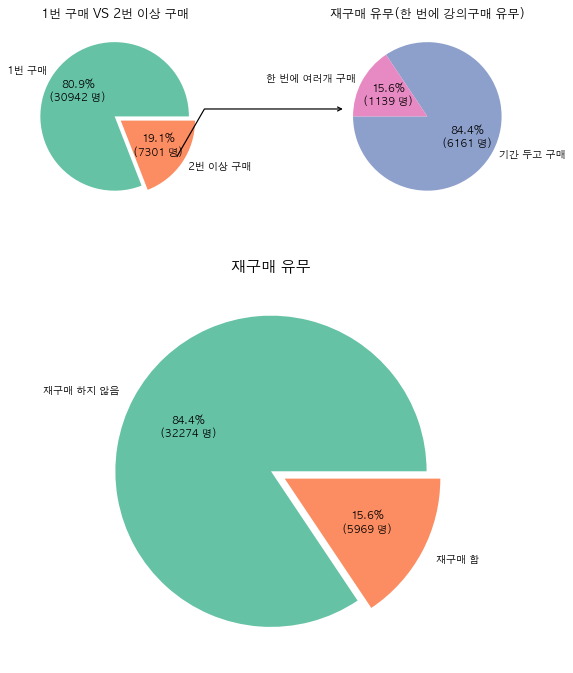

In [ ]:
plt.figure(figsize=(8, 10))

ax1 = plt.subplot2grid((7, 2), (0, 0), rowspan=3)
plt.title(f'1번 구매 VS 2번 이상 구매', size=12)
labels = ['1번 구매', '2번 이상 구매']
colors = sns.color_palette('Set2')

def func(pct, data):
    val = int(np.round(pct/100 * data.sum(), 0))
    if pct > 3:
        return f"{pct:.1f}%\n({val} 명)"
ax1.pie(df_payment_check.repurchase_check.value_counts(), explode= [0, 0.1], colors=colors, labels=labels, autopct=lambda pct: func(pct, df_payment_check.repurchase_check.value_counts()))
ang1, ang2 = ax1.patches[1].theta1, ax1.patches[1].theta2
ang = (ang2 + ang1)/2 ## 중심각
x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표

plt.ylabel('')

ax2 = plt.subplot2grid((7, 2), (0, 1), rowspan=3)
colors = sns.color_palette('Set2')
labels = ['기간 두고 구매', '한 번에 여러개 구매']
plt.title(f'재구매 유무(한 번에 강의구매 유무)', size=12)
ax2.pie(df_payment_check.purchase_once.value_counts(),startangle=180, colors=colors[2:], labels=labels, autopct=lambda pct: func(pct, data))

ang1_, ang2_ = ax2.patches[0].theta1, ax2.patches[0].theta2
ang_ = (ang2_ - ang1_)/2. + ang1_ ## 중심각
x_ = np.cos(np.deg2rad(ang_)) ## Annotation의 끝점에 해당하는 x좌표
y_ = np.sin(np.deg2rad(ang_)) ## Annotation의 끝점에 해당하는 y좌표

config = dict(arrowprops=dict(arrowstyle='<-', color='black', linewidth=1.2))
connectionstyle = f"angle,angleA=0,angleB=60"
config["arrowprops"].update({"connectionstyle": connectionstyle})
ax2.annotate("", xy=(x, y), xycoords=ax1.transData, xytext=(3.1, 0.1), color='black', **config)

df_payment_check_copy = df_payment_check.copy()
df_payment_check_copy.loc[df_payment_check.purchase_once == 1, 'repurchase_check'] = 0

ax3 = plt.subplot2grid((7, 2), (3, 0),rowspan=4, colspan=2)
plt.title('재구매 유무', size=15)
labels=['재구매 하지 않음', '재구매 함']
ax3.pie(df_payment_check_copy.repurchase_check.value_counts(), explode= [0, 0.1], colors=colors, labels=labels, autopct=lambda pct: func(pct, df_payment_check.repurchase_check.value_counts()))

plt.tight_layout()
plt.ylabel('')
plt.show()

<div class="alert alert-block alert-success">
    데이터 내에서 결제 횟수가 2번 이상인 고객 중에서, 하루에 2건 이상의 결제를 한 고객 id 를 찾아 '재구매 하지 않음'으로 분류하였다. <br>
    결과적으로 84.4%의 고객이 주어진 기간 내, 즉 6개월간 재구매 하지 않았음을 알 수 있었다.
    </div>


In [ ]:
#쿠폰 사용 고객들에 대한 분석

df_cpn = df[df['coupon_title'].isna() == 0]
df_cpn_wlc = df_cpn[df_cpn['coupon_title'].str.contains('웰컴|WELCOME')]
df_cpn_wlc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11501 entries, 1 to 50379
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      11501 non-null  int64         
 1   customer_id             11501 non-null  float64       
 2   course_id               11501 non-null  float64       
 3   type                    11501 non-null  object        
 4   state                   11501 non-null  object        
 5   course_title            11501 non-null  object        
 6   category_title          11501 non-null  object        
 7   format                  11501 non-null  object        
 8   completed_at            11501 non-null  datetime64[ns]
 9   transaction_amount      11501 non-null  int64         
 10  coupon_title            11501 non-null  object        
 11  coupon_discount_amount  11501 non-null  float64       
 12  new_coupon_discount     11501 non-null  float6

In [ ]:
# 전체 구매 대비 웰컴쿠폰 구매율
print('전체 구매 대비 웰컴쿠폰 구매율:')
print('%.2f%%' %((df_cpn_wlc['id'].count()/df['id'].count()) *100))

# 전체 쿠폰 사용 구매 대비 웰컴쿠폰 
print('쿠폰 사용 건 중 웰컴 쿠폰의 비율:')
print('%.2f%%' %((df_cpn_wlc['id'].count()/df_cpn['id'].count()) *100))

전체 구매 대비 웰컴쿠폰 구매율:
22.83%
쿠폰 사용 건 중 웰컴 쿠폰의 비율:
51.32%


##### [결론]
<div class="alert alert-block alert-success">
    데이터가 주어진 기간 내 '2회 이상 재구매'를 한 고객보다는 '신규 고객' 혹은 '한 번에 많은 수의 강의를 산 고객' 의 수가 많았다. <br>
    전체 쿠폰 사용 구매 건 수의 과반 이상이 웰컴 쿠폰 사용자임을 고려했을 때 웰컴쿠폰이 신규고객 유입에 상당한 효과가 있는 것으로 확인하였으므로 <br>
    웰컴 쿠폰 이벤트를 유지하고, 앞으로 신규 고객을 적극적으로 늘리기 위한 추가적인 프로모션을 기획할 필요가 있다. 
</div>

#### [가설 7.]  가장 많이 사용되는 결제 대행사와 관련된 프로모션 전략이 유효할 것이다. 

<div class="alert alert-block alert-success">
    <b>1. 실제로 진행되었던 '카카오페이' 관련 프로모션이 효과가 있었는지 살펴보았다.<br>
    </b> - 카카오이벤트(21. 07. 16 ~ 21. 07. 31) 효과 있었을까?? https://fastcampus.co.kr/event_online_kakaopay<br>
   <b> 2. 특정 결제 대행사와 관련있는 프로모션이 효과가 있었다면, 가장 많이 사용되는 결제 대행사와의 협업을 통해 그 효과를 키울 수 있을 것이다. </b>
</div>


<img src="https://storage.googleapis.com/static.fastcampus.co.kr/prod/uploads/202107/101643-81/%ED%8C%A8%EC%8A%A4%ED%8A%B8%EC%BA%A0%ED%8D%BC%EC%8A%A4x%EC%B9%B4%EC%B9%B4%EC%98%A4%ED%8E%98%EC%9D%B4-pc-1-.png" width = "60%" height = "auto">
<img src="https://storage.googleapis.com/static.fastcampus.co.kr/prod/uploads/202107/184023-397/%ED%8C%A8%EC%8A%A4%ED%8A%B8%EC%BA%A0%ED%8D%BC%EC%8A%A4x%EC%B9%B4%EC%B9%B4%EC%98%A4%ED%8E%98%EC%9D%B4-pc-2-.png" width = "60%" height = "auto">


In [ ]:
df_pg = df[df['pg'].isna() == False]
df_pg.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,new_coupon_discount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
3769,996296,147116.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-04-07 14:03:39,113000,NaN,NaN,0.0,113000.0,113000.0,INICIS,CARD,프론트엔드 개발,2021-02-02
3771,996301,147033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-04-07 14:08:37,118000,NaN,NaN,0.0,118000.0,118000.0,INICIS,VBANK,영상 편집,2020-12-02
3773,996334,489532.0,201133.0,PAYMENT,COMPLETED,"올인원 패키지 : HTML/CSS, JavaScript",프로그래밍,올인원,2021-04-07 14:11:19,85500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,1.0,105500.0,105500.0,INICIS,CARD,NaN,2019-07-11
3774,996347,489344.0,201998.0,PAYMENT,COMPLETED,올인원 패키지 : iOS 앱 개발,프로그래밍,올인원,2021-04-07 14:15:18,92000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,1.0,112000.0,112000.0,INICIS,CARD,모바일앱,2020-01-14
3775,996356,149721.0,203535.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 PPT 제작/디자인,업무 생산성,올인원,2021-04-07 14:18:19,100000,NaN,NaN,0.0,100000.0,100000.0,INICIS,CARD,PPT/보고서,2021-03-10


In [ ]:
# PG를 통한 전체 구매건수 기준: 비교를 위해 PG 통하지 않은 구매 건수는 제외 함
# 일별 구매 건수를 보기위해 날자만 발췌
df_pg_cpl_d = df_pg.loc[:,['id','completed_at','pg']]
df_pg_cpl_d['date'] = pd.to_datetime(df_pg_cpl_d['completed_at']).dt.date #df_pg_cpl_d['completed_at'].str[:10]
df_pg_cpl_d.head()

,id,completed_at,pg,date
3769,996296,2021-04-07 14:03:39,INICIS,2021-04-07
3771,996301,2021-04-07 14:08:37,INICIS,2021-04-07
3773,996334,2021-04-07 14:11:19,INICIS,2021-04-07
3774,996347,2021-04-07 14:15:18,INICIS,2021-04-07
3775,996356,2021-04-07 14:18:19,INICIS,2021-04-07


In [ ]:
# 카카오만...
df_pg_kakao = df_pg_cpl_d[df_pg_cpl_d['pg'] == 'KAKAO']
df_pg_kakao

,id,completed_at,pg,date
8900,1036161,2021-04-28 15:47:16,KAKAO,2021-04-28
8907,1036211,2021-04-28 15:55:50,KAKAO,2021-04-28
8908,1036237,2021-04-28 16:01:50,KAKAO,2021-04-28
8909,1036249,2021-04-28 16:03:24,KAKAO,2021-04-28
8920,1036380,2021-04-28 16:38:01,KAKAO,2021-04-28
...,...,...,...,...
50360,1364842,2021-09-25 10:56:03,KAKAO,2021-09-25
50364,1364869,2021-09-25 11:22:07,KAKAO,2021-09-25
50365,1364875,2021-09-25 11:29:36,KAKAO,2021-09-25
50367,1364886,2021-09-25 11:54:34,KAKAO,2021-09-25


In [ ]:
# 날짜별 그룹화 및 카운팅
group_pg_kakao = df_pg_kakao.groupby(['date'])
group_pg_kakao_cnt = group_pg_kakao[['id']].count().reset_index()
group_pg_kakao_cnt.head()

,date,id
0,2021-04-28,52
1,2021-04-29,125
2,2021-04-30,226
3,2021-05-01,51
4,2021-05-02,86


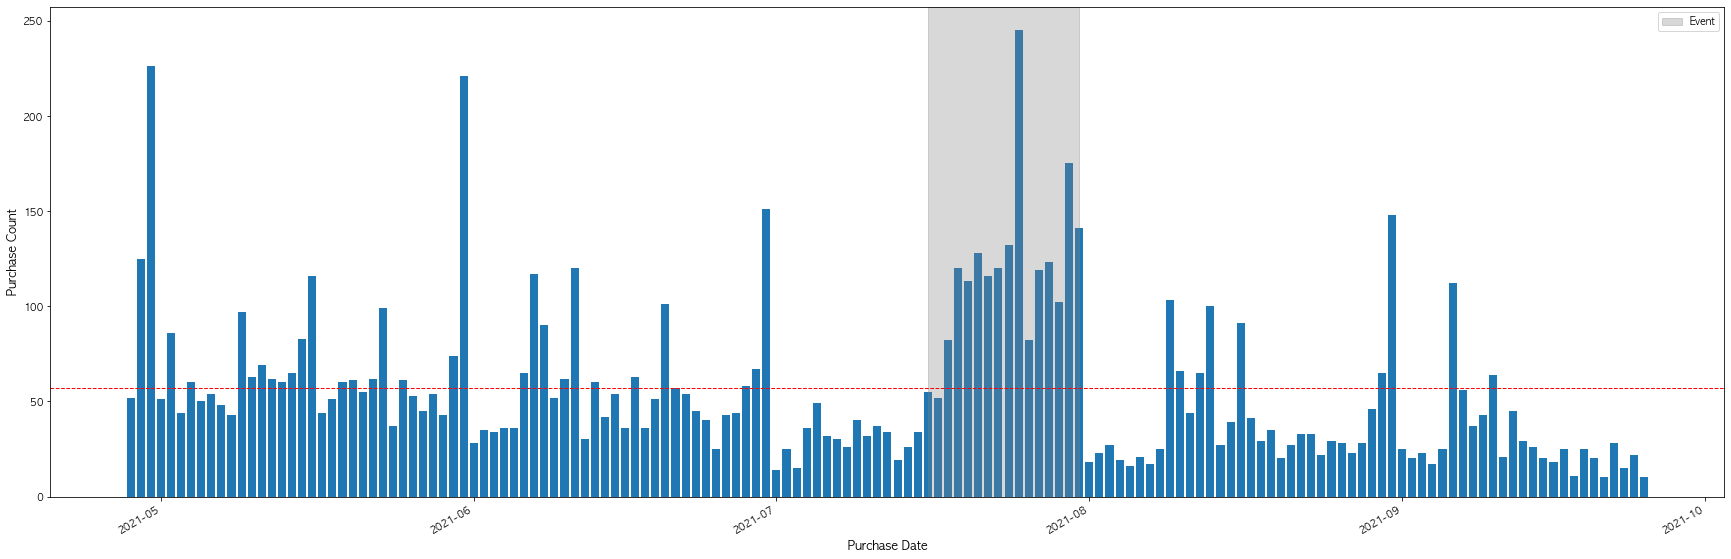

In [ ]:
# 시각화
from datetime import datetime
from matplotlib.dates import date2num

fig, ax = plt.subplots(figsize=(30,10))
ax.bar(group_pg_kakao_cnt['date'], group_pg_kakao_cnt['id'])
ax.axvspan(date2num(datetime(2021,7,16)), date2num(datetime(2021,7,31)), label="Event", color="grey", alpha=0.3)  # 이벤트 구간 음영설정
ax.axhline(y=group_pg_kakao_cnt.id.mean(), color='r', linestyle='--', linewidth=1)  # 평균 구매건수 표시
ax.set_xlabel('Purchase Date', size=12)
ax.set_ylabel('Purchase Count', size=12)

ax.legend()
fig.autofmt_xdate()

plt.show()

In [ ]:
# 카카오페이 결제 데이터 전체 기간 중 이벤트에 해당되는 날짜의 비율

# data_start = datetime(2021, 3, 29)
# data_end = datetime(2021, 9, 26)

data_start = datetime(2021, 4, 28)
data_end = datetime(2021, 9, 25)

event_start = datetime(2021, 7, 16)
event_end = datetime(2021, 7, 31)

data_days = (data_end - data_start).days
event_days = (event_end - event_start).days

print('카카오페이를 통한 전체 결제 기간 중 이벤트 기간에 해당하는 비율:')
print('%.2f%%' %((event_days/data_days)*100))

# 카카오페이를 통한 전체 구매건 수 중 카카오이벤트 쿠폰을 사용한 구매의 비율
df_kakao = pd.DataFrame(pd.to_datetime(df_pg[df_pg['pg'] == 'KAKAO']['completed_at']))
df_kakao['event'] = (df_kakao['completed_at'] >= '2021-07-16') & (df_kakao['completed_at'] <= '2021-07-31')
df_kakao
print('카카오페이 결제 건 중 쿠폰 사용 비율:')
print('%.2f%%' %((df_kakao['event'][df_kakao['event'] == True].count() / df_kakao['completed_at'].count())*100))


카카오페이를 통한 전체 결제 기간 중 이벤트 기간에 해당하는 비율:
10.00%
카카오페이 결제 건 중 쿠폰 사용 비율:
20.48%


<div class="alert alert-block alert-success">
카카오페이 이벤트 기간(7.16~7.31)동안 구매건수가 카카오페이를 통한 평균 구매 건수 평균(빨간 점선)보다 2배 가량 높은 것을 확인할 수 있었다. <br>
전체 기간 대비 구매건수 비율로 보았을때도 전체 기간 중 10%의 기간동안 약 20.5%에 달하는 구매 건 수를 기록하였다. <br>
이처럼 <b>특정 결제대행사와 관련된 혜택을 제공했을 때 유의미하게 결제 건수가 늘어남</b>을 확인하였으니, <br>
가장 큰 효과를 볼 수 있는 결제 대행사를 찾아보자.</div>

In [ ]:
# 결측치 제거 (각 PG사 별 사용 점유율 확인을 위해 null은 고려 배제)
df_pg = df[df['pg'].isna() == False]
df_pg.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,new_coupon_discount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
3769,996296,147116.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-04-07 14:03:39,113000,NaN,NaN,0.0,113000.0,113000.0,INICIS,CARD,프론트엔드 개발,2021-02-02
3771,996301,147033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-04-07 14:08:37,118000,NaN,NaN,0.0,118000.0,118000.0,INICIS,VBANK,영상 편집,2020-12-02
3773,996334,489532.0,201133.0,PAYMENT,COMPLETED,"올인원 패키지 : HTML/CSS, JavaScript",프로그래밍,올인원,2021-04-07 14:11:19,85500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,1.0,105500.0,105500.0,INICIS,CARD,NaN,2019-07-11
3774,996347,489344.0,201998.0,PAYMENT,COMPLETED,올인원 패키지 : iOS 앱 개발,프로그래밍,올인원,2021-04-07 14:15:18,92000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,1.0,112000.0,112000.0,INICIS,CARD,모바일앱,2020-01-14
3775,996356,149721.0,203535.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 PPT 제작/디자인,업무 생산성,올인원,2021-04-07 14:18:19,100000,NaN,NaN,0.0,100000.0,100000.0,INICIS,CARD,PPT/보고서,2021-03-10


In [ ]:
# PG사별 이용 건수 확인
df_pg_cnt = df_pg[['pg','completed_at']].groupby('pg').count().sort_values(by='completed_at', ascending=False)
df_pg_cnt

,completed_at
pg,
INICIS,26079
KAKAO,8615
NAVER,4234
PAYCO,2169
CHAI,140


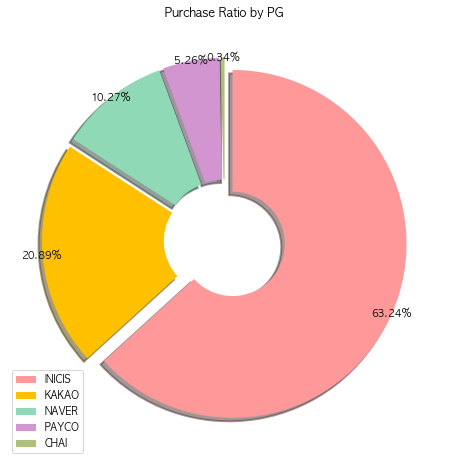

In [ ]:
# 시각화
plt.figure(figsize=(10,8))
plt.pie(df_pg_cnt['completed_at'], autopct='%.2f%%', pctdistance=1, startangle=90, counterclock=False, explode=[0.05,0.05,0.05,0.05,0.05], shadow=True, colors=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', "#adc178"], wedgeprops={'width': 0.7, 'linewidth': 2})
plt.title('Purchase Ratio by PG')
plt.legend(df_pg_cnt.index)
plt.show()

##### [결론]
<div class="alert alert-block alert-success">
1. 특정 결제대행사를 통한 할인 프로모션이 결제 건수 증가에 유의미한 영향을 끼침을 확인하였다. <br>
2. 대형 플랫폼 기업인 네이버나 카카오보다 국내 PG 선발 브랜드인 이니시스가 결제 대행사를 통한 결제건 중 압도적인 점유율을 보였다. <br>
 3. 이니시스와의 협업이나 결제 이벤트 등 프로모션 추진이 유효할 것이다.
</div>

## 활용방안 정리
<br>
<span style="font-size:130%">
    
 - 결제 건수가 많았던 요일 및 시간대에 맞추어 광고 효율을 높일 수 있다. <br>
 - 신규 고객을 대상으로 한 쿠폰 프로모션을 유지하는 것이 고객의 재구매 유도 전략보다 효과적일 것이다. <br>
 - 하위 카테고리 분석을 기반으로 강의 수가 적은 카테고리에 신규 강의를 추가하여 결제 건수의 증가를 기대할 수 있다. <br>
 - 결제 대행사 점유율이 가장 높은 '이니시스'와의 협업 혹은 결제 프로모션을 통해 매출을 증가시킬 수 있다.
    <br>
    
    </span>  

####  번외. 
‘회사 내 협업'의 관점에서, 데이터 팀에 추가로 요청할만한 항목들 <br>
 - 구매자 정보 (직장인/학생 여부, 연령대)<br>
 고객의 연령대 분포 혹은 상태에 맞춘 마케팅 전략 수립이 가능<br>
 - 강의 수강에 대한 추가적인 정보 (강의 길이, 강의 수강 완료까지의 기간)<br>
 강의의 수강 완료 여부에 따라 강의의 개선점을 찾고, 평균적으로 수강하는 데 걸리는 기간을 계산하여 연계 강의 추천 가능<br>
 - 강의 원가 혹은 손익분기점<br>
 쿠폰 할인율을 어디까지 높일 수 있는지 확인하여 신규 고객 유치를 위한 적극적인 마케팅에 활용 가능
